In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import umap as umap
abc

In [5]:
path = "D:\minh\Machine learning 2\heart_dataset\Heart_disease.csv"

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\vuong\AppData\Local\Temp\ipykernel_31072\2214594540.py:1: SyntaxWarning: invalid escape sequence '\m'
  path = "D:\minh\Machine learning 2\heart_dataset\Heart_disease.csv"


In [6]:
df = pd.read_csv(path)

In [6]:
print("--- Mean ---")
print(df.mean(numeric_only=True))

--- Mean ---
age          54.433333
sex           0.677778
cp            2.174074
trestbps    131.344444
chol        249.659259
fbs           0.148148
restecg       1.022222
thalach     149.677778
exang         0.329630
oldpeak       1.050000
slope         0.585185
ca            0.670370
thal          1.822222
target        0.444444
dtype: float64


In [7]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [8]:
variance_val = df['trestbps'].var()
print(f"\ntrestbps: {variance_val}")


trestbps: 319.03705080545234


In [9]:
variance_val = df['chol'].var()
print(f"\nchol: {variance_val}")


chol: 2671.4671072559545


In [10]:
covariance_val = df['trestbps'].cov(df['chol'])
print(f"Covariance between blood pressure and cholesterol: {covariance_val}")

Covariance between blood pressure and cholesterol: 159.73118546055343


In [11]:
correlation_val = df['trestbps'].corr(df['chol'])
print(f"Correlation between trestbps and chol : {correlation_val}")

Correlation between trestbps and chol : 0.17301917553469243


In [12]:
scaler = MinMaxScaler()
df[['trestbps', 'chol']] = scaler.fit_transform(df[['trestbps', 'chol']])

In [13]:
# normalize data
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# create a copy of the dataframe to avoid modifying the original data
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [14]:
# apply PCA
pca = PCA(n_components=0.90)
X_final = pca.fit_transform(df_scaled)

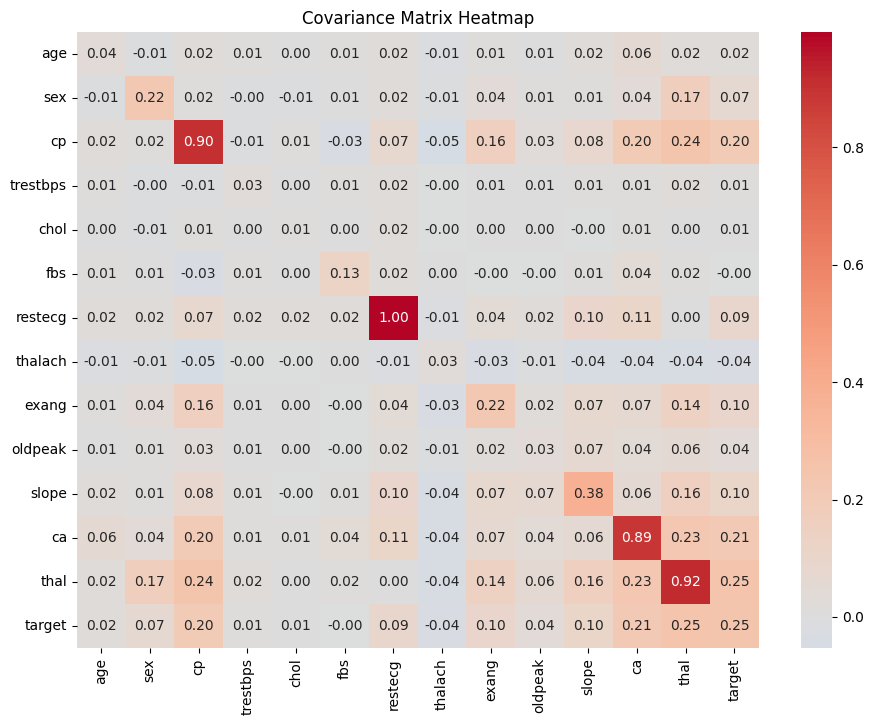

In [19]:
cov_matrix = df_scaled.cov(numeric_only=True)

# 3. Vẽ biểu đồ nhiệt (Heatmap)
plt.figure(figsize=(11, 8))
sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm',color='blue', center=0)
plt.title('Covariance Matrix Heatmap')
plt.show()

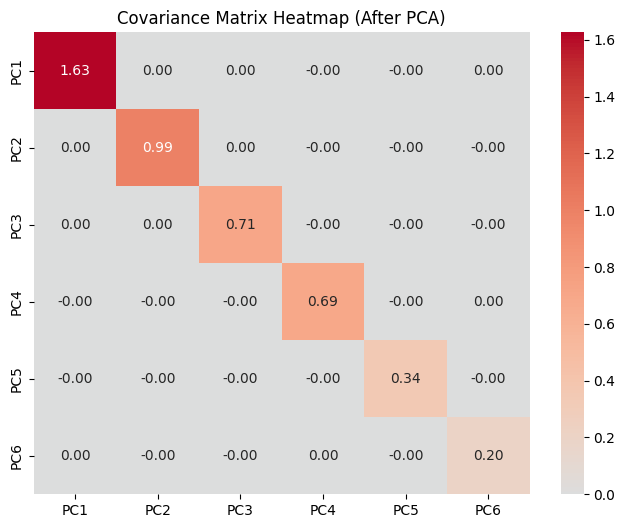

In [18]:
df_pca_result = pd.DataFrame(X_final, columns=[f'PC{i+1}' for i in range(X_final.shape[1])])

# 2. Tính ma trận hiệp phương sai (Sửa lỗi chính tả numeric_only)
cov_matrix_PCA = df_pca_result.cov() 

# 3. Vẽ Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix_PCA, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Covariance Matrix Heatmap (After PCA)')
plt.show()

In [25]:
# Xem ma trận trọng số (Loadings)
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=df.columns
)

print("level:")
print(loadings)

level:
               PC1       PC2       PC3       PC4       PC5       PC6
age       0.041674  0.018926 -0.040645 -0.038652  0.045449 -0.046578
sex       0.109131 -0.050682 -0.075066  0.187731 -0.175930  0.706247
cp        0.490568 -0.110857  0.754365 -0.356441 -0.080344 -0.088987
trestbps  0.017045  0.014450 -0.024198  0.020477  0.031851 -0.032565
chol      0.012839  0.017187  0.000095 -0.010824 -0.005203 -0.041377
fbs       0.012175  0.021181 -0.091284  0.005155  0.013458 -0.028841
restecg   0.233874  0.936466  0.054336  0.191990 -0.152945 -0.051509
thalach  -0.062203  0.004839 -0.012572  0.007976 -0.095357 -0.049105
exang     0.178570 -0.025201  0.103645  0.057247  0.147160  0.537750
oldpeak   0.064659  0.002425 -0.018372  0.031773  0.155178  0.003081
slope     0.187194  0.049628  0.004367  0.203650  0.895706 -0.091868
ca        0.478229  0.030171 -0.610594 -0.603796 -0.002415 -0.030943
thal      0.547076 -0.320309 -0.163813  0.622450 -0.264492 -0.313817
target    0.295674 -0.01507